# ***ASSIGNMENT - 19***

## Importing required Libraries|

In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Downloading stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Data Cleaning**

In [ ]:
# ------------------------------------------------------------
# 1: Load Dataset
# ------------------------------------------------------------

data = pd.read_csv("amazonreviews.tsv", sep="\t")

print("\nDataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())


# ------------------------------------------------------------
# 2: Remove Duplicates and Handle Missing Values
# ------------------------------------------------------------

data.drop_duplicates(inplace=True)
data.dropna(subset=["review"], inplace=True)

print("\nDataset Shape after cleaning:", data.shape)

# ------------------------------------------------------------
# 3: Text Preprocessing
# ------------------------------------------------------------

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

data["clean_review"] = data["review"].apply(clean_text)


Dataset Shape: (10000, 2)

First 5 rows:
  label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...

Dataset Shape after cleaning: (10000, 2)


## **Exploratory Analysis**

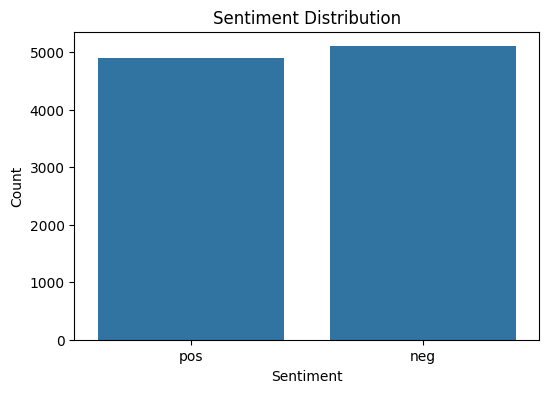

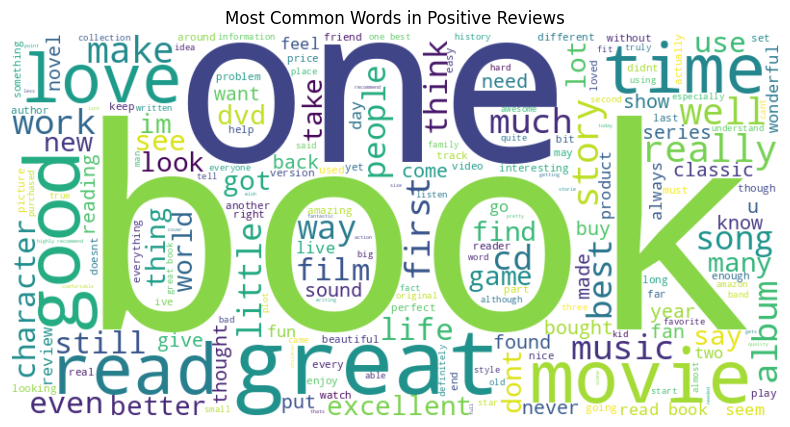

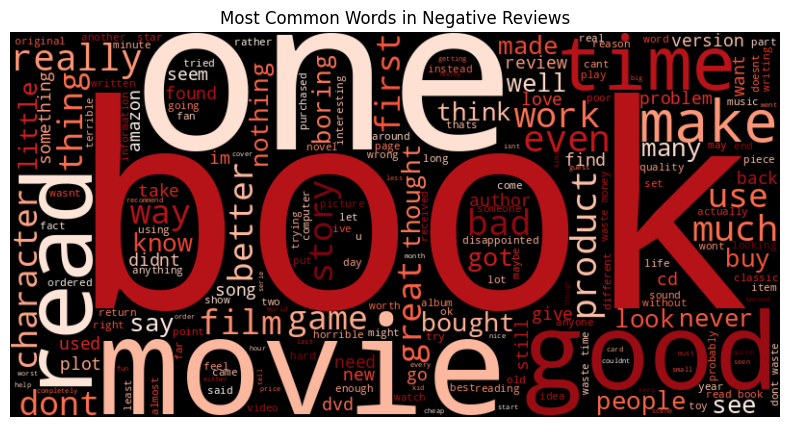

In [ ]:
# ------------------------------------------------------------
# 1: Sentiment Distribution
# ------------------------------------------------------------

plt.figure(figsize=(6, 4))
sns.countplot(x="label", data=data)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ------------------------------------------------------------
# 2: Word Cloud for Positive Reviews
# ------------------------------------------------------------

positive_text = " ".join(data[data["label"] == "pos"]["clean_review"])
wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Positive Reviews")
plt.show()

# ------------------------------------------------------------
# 3: Word Cloud for Negative Reviews
# ------------------------------------------------------------

negative_text = " ".join(data[data["label"] == "neg"]["clean_review"])
wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="Reds"
).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Reviews")
plt.show()

## **Model Development**

In [ ]:
# ------------------------------------------------------------
# 1: Train–Test Split
# ------------------------------------------------------------

X = data["clean_review"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y)

# ------------------------------------------------------------
# 2: TF-IDF Vectorization
# ------------------------------------------------------------

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# ------------------------------------------------------------
# 3: Model Training (Logistic Regression)
# ------------------------------------------------------------

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## **Validation**

In [ ]:
# ------------------------------------------------------------
# P1: Predictions
# ------------------------------------------------------------

y_pred = model.predict(X_test_tfidf)


# ------------------------------------------------------------
# 2: Evaluation Metrics
# ------------------------------------------------------------

print("\nModel Performance on Test Data:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred, pos_label="pos"))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ------------------------------------------------------------
# Part 4.3: Cross-Validation
# ------------------------------------------------------------

cv_scores = cross_val_score(
    model,
    X_train_tfidf,
    y_train,
    cv=5,
    scoring="f1_macro")

print("\nCross-Validation F1 Scores:", cv_scores)
print("Average CV F1 Score:", cv_scores.mean())


Model Performance on Test Data:
Accuracy : 0.856
F1 Score : 0.8529111338100103

Classification Report:
              precision    recall  f1-score   support

         neg       0.86      0.86      0.86      1019
         pos       0.85      0.85      0.85       981

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


Cross-Validation F1 Scores: [0.85873212 0.8556087  0.86556067 0.8586431  0.84997656]
Average CV F1 Score: 0.8577042293440108


## **Theoretical Discussion**

1. Why Sentiment Analysis?

- Ratings alone may not reflect true customer satisfaction.
Text-based sentiment analysis captures emotions and intent.

2. Why TF-IDF?

- TF-IDF highlights important words while reducing the impact
of common, less informative words.

3. Why Logistic Regression?

- It is efficient, interpretable, and performs well for
high-dimensional sparse text data.

4. Business Impact:
- This system helps detect sudden increases in negative reviews,
enabling faster response and improved customer satisfaction.

5. Possible Improvements:
- Use Word2Vec or BERT embeddings
- Apply deep learning models (LSTM, Transformers)
- Perform aspect-based sentiment analysis